In [ ]:
pwd

'/content'

# Imports Libraries

In [230]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
nltk.download('punkt')
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download('stopwords')
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atefe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atefe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [3]:
# pip install wordcloud

# Import the Data

In [175]:
training = pd.read_csv('twitter_training.csv', encoding='iso-8859-1')
validation = pd.read_csv('twitter_validation.csv', encoding='iso-8859-1')
test = pd.read_csv('twitter_test.csv', encoding='iso-8859-1')

In [176]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [177]:
train_content_values=training['Tweet content'].values

In [178]:
training.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [179]:
# Removing the unnecessary columns.
training = training[['Tweet ID','sentiment','Tweet content']]
validation = validation[['Tweet ID','sentiment','Tweet content']]
test = test[['Tweet ID','sentiment','Tweet content']]

In [75]:
training

,Tweet ID,sentiment,Tweet content
0,2401,Positive,im getting on borderlands and i will murder yo...
1,2401,Positive,I am coming to the borders and I will kill you...
2,2401,Positive,im getting on borderlands and i will kill you ...
3,2401,Positive,im coming on borderlands and i will murder you...
4,2401,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,9200,Positive,Just realized that the Windows partition of my...
74678,9200,Positive,Just realized that my Mac window partition is ...
74679,9200,Positive,Just realized the windows partition of my Mac ...
74680,9200,Positive,Just realized between the windows partition of...


In [180]:
validation

,Tweet ID,sentiment,Tweet content
0,5328,Negative,@BlizzardCS whatâs going on with Hearthstone...
1,7618,Negative,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,Negative,Johnson & Johnson is about to enter phase 3 tr...
3,10008,Negative,How is banning #PUBG going to fix anything? Al...
4,49,Neutral,I played this interesting quiz on Amazon - Try...
...,...,...,...
495,4891,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
496,4359,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
497,2652,Positive,Today sucked so itâs time to drink wine n pl...
498,8069,Positive,Bought a fraction of Microsoft today. Small wins.


In [181]:
test

,Tweet ID,sentiment,Tweet content
0,3364,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Neutral,Now the President is slapping Americans in the...
...,...,...,...
495,8055,Positive,special shoutouts to microsoft excel 2013
496,6787,Irrelevant,Dumb Luckyâï¸ (Fortnite Montage) youtu.be...
497,3838,Positive,Dang there goes my birthday present but maybe ...
498,2008,Irrelevant,It was ab fab seeing the 6 bungalows built in ...


In [182]:
training.shape

(74682, 3)

In [183]:
test.shape

(500, 3)

In [184]:
validation.shape

(500, 3)

# convert categorical to numeric(Sentiment)

In [185]:
training.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [186]:
training['sentiment'].replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                        [0, 1, 2, 3], inplace=True)
test['sentiment'].replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                        [0, 1, 2, 3], inplace=True)
validation['sentiment'].replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                        [0, 1, 2, 3], inplace=True)

# Data visualization

# Distribution of target class

<Axes: xlabel='sentiment', ylabel='count'>

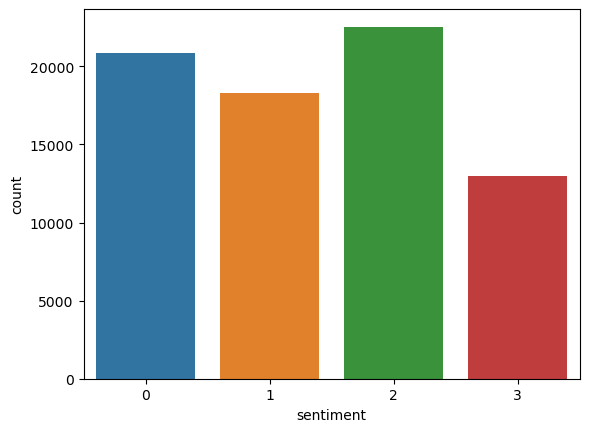

In [187]:
sns.countplot(x='sentiment',data=training)

In [194]:
# Compute class weights based on the training set
c_weights = compute_class_weight('balanced', classes=np.unique(training['sentiment']), y=training['sentiment'])
c_weightS_dict = dict(zip(np.unique(training['sentiment']), c_weights))

# Print the computed class weights and the dictionary
print("Class Weights:", c_weights)
print("Class Weight Dictionary:", c_weightS_dict)

Class Weights: [0.89449764 1.02372608 0.82692999 1.4369095 ]
Class Weight Dictionary: {0: 0.8944976425411948, 1: 1.0237260792167335, 2: 0.8269299901141368, 3: 1.436909502615757}


In [188]:
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#               collocations=False).generate(" ".join(data_pos))
# plt.figure(figsize = (20,20))
# plt.imshow(wc)

# Data Cleaning

In [195]:
def clean_tweets(tweet):
    # Check if the tweet is a non-null string
    if isinstance(tweet, str) and not pd.isnull(tweet):

        # remove URL
        tweet = re.sub(r"http\S+", "", tweet)
        # convert to lower case alpha
        tweet = tweet.lower()

        # Remove short links (e.g., buff.ly/2WmmiP5)
        tweet = re.sub(r'\b(?:buff\.ly|dlvr\.it)/\S+', "", tweet)

        # Remove usernames
        tweet = re.sub(r"@[^\s]+[\s]?", '', tweet)

        # remove special characters for example {!,?,...}
        tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)

        # remove Numbers
        tweet = re.sub('[0-9]', '', tweet)

        return tweet
    else:
        # If the tweet is NaN or not a string, return it unchanged
        return tweet

# Apply the clean_tweets function to the 'Tweet content' column
training['Tweet content'] = training['Tweet content'].apply(clean_tweets)
validation['Tweet content'] = validation['Tweet content'].apply(clean_tweets)
test['Tweet content'] = test['Tweet content'].apply(clean_tweets)

In [196]:
training.shape

(73610, 3)

In [197]:
def remove_extra_spaces(df):
    df['Tweet content'] = df['Tweet content'].str.strip()
    for i in range(len(df)):
        if df['Tweet content'][i]== '':
            df['Tweet content'][i] = None 
    training.dropna(subset=['Tweet content'], inplace=True)
    training.reset_index(drop=True,inplace=True)
    return df

training = remove_extra_spaces(training)
test = remove_extra_spaces(test)
validation = remove_extra_spaces(validation)
# training['Tweet content']=training['Tweet content'].str.s

In [198]:
training.shape

(73610, 3)

In [199]:
# training.to_csv('test', sep='\t', encoding='utf-8')

In [200]:
training['Tweet content']

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands  and i will murder y...
                               ...                        
73605    just realized that the windows partition of my...
73606    just realized that my mac window partition is ...
73607    just realized the windows partition of my mac ...
73608    just realized between the windows partition of...
73609    just like the windows partition of my mac is l...
Name: Tweet content, Length: 73610, dtype: object

In [201]:
type(training)

pandas.core.frame.DataFrame

In [202]:
# removing the stop words except "not"
stop_words = stopwords.words("english")
whitelist = ["n't", "not"]
filtered_list = [item for item in stop_words if item not in whitelist]
# Define a function to remove stop words
def remove_stop_words(word_list):
    tweet_without_stopwords = [word for word in  
                              word_list.split()
                              if word.lower() not in filtered_list]
    joined_tokens = [" ".join(tweet_without_stopwords)]
#     return tweet_without_stopwords
    return joined_tokens

In [203]:
training['Tweet content'] = training['Tweet content'].apply(remove_stop_words)
test['Tweet content'] = test['Tweet content'].apply(remove_stop_words)
validation['Tweet content'] = validation['Tweet content'].apply(remove_stop_words)

In [204]:
training

,Tweet ID,sentiment,Tweet content
0,2401,0,[im getting borderlands murder]
1,2401,0,[coming borders kill]
2,2401,0,[im getting borderlands kill]
3,2401,0,[im coming borderlands murder]
4,2401,0,[im getting borderlands murder]
...,...,...,...
73605,9200,0,[realized windows partition mac like years beh...
73606,9200,0,[realized mac window partition years behind nv...
73607,9200,0,[realized windows partition mac years behind n...
73608,9200,0,[realized windows partition mac like years beh...


In [205]:
# training.to_csv('clean_train', sep='\t', encoding='utf-8')

Stemming

In [206]:
#stem the words
ps = PorterStemmer()
# Define a function to stem the words
def stemming(word_list):
    tweet_with_stem = []
    split_list = [word for sentence in word_list for word in sentence.split()]
    for w in split_list:
        w = ps.stem(w)
        tweet_with_stem.append(w)
    return tweet_with_stem

In [207]:
training['Tweet content'] = training['Tweet content'].apply(stemming)
test['Tweet content'] = test['Tweet content'].apply(stemming)
validation['Tweet content'] = validation['Tweet content'].apply(stemming)

In [208]:
training

,Tweet ID,sentiment,Tweet content
0,2401,0,"[im, get, borderland, murder]"
1,2401,0,"[come, border, kill]"
2,2401,0,"[im, get, borderland, kill]"
3,2401,0,"[im, come, borderland, murder]"
4,2401,0,"[im, get, borderland, murder]"
...,...,...,...
73605,9200,0,"[realiz, window, partit, mac, like, year, behi..."
73606,9200,0,"[realiz, mac, window, partit, year, behind, nv..."
73607,9200,0,"[realiz, window, partit, mac, year, behind, nv..."
73608,9200,0,"[realiz, window, partit, mac, like, year, behi..."


In [210]:
# lemmatizer = WordNetLemmatizer()
# with tqdm(total=len(training['Tweet content'])) as pbar:
#     for tweet in training['Tweet content']:
#         lemmatized = [lemmatizer.lemmatize(word) for word in tweet]
#         tweets.append(lemmatized)
#         pbar.update(1)

# Word embedding

# Glove

In [103]:
import numpy as np

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r',encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model
glove_model_path = 'glove.6B.100d.txt'  # path to your GloVe file
glove_model = load_glove_model(glove_model_path)

Loading Glove Model
400000 words loaded!


In [212]:
def embedd(tweet):
    # If the tweet is a list, join its elements into a string
    if isinstance(tweet, list):
        tweet = ' '.join(map(str, tweet))

    # Tokenize the tweet
    tokens = word_tokenize(tweet.lower())

    # Filter valid words and get their embeddings
    embeddings = [glove_model[word] for word in tokens if word in glove_model]

    # Check if there are valid embeddings
    if embeddings:
        # Calculate the mean embedding (e.g., using np.mean)
        aggregated_embedding = np.mean(embeddings, axis=0)
        return aggregated_embedding
    else:
        # Return zeros if there are no valid embeddings
        return np.zeros(100)

In [213]:
test['glove'] = test['Tweet content'].apply(embedd)

In [214]:
validation['glove'] = validation['Tweet content'].apply(embedd)

In [215]:
training['glove'] = training['Tweet content'].apply(embedd)

In [216]:
training['glove'].shape

(73610,)

In [217]:
len(training['glove'][1])

100

In [218]:
training.dropna(subset=['glove'], inplace=True)

In [219]:
training['glove'].shape

(73610,)

# Train Model

# Random Forest

In [229]:
# Create X_train and y_train
X_train_RF = np.vstack(training['glove'].to_numpy())
y_train_RF = np.array(training['sentiment'])

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=c_weightS_dict)
rf_model.fit(X_train_RF, y_train_RF)

RandomForestClassifier(class_weight={0: 0.8944976425411948,
                                     1: 1.0237260792167335,
                                     2: 0.8269299901141368,
                                     3: 1.436909502615757},
                       random_state=42)

In [232]:
X_test_RF = np.vstack(test['glove'].to_numpy())
y_test_RF = np.array(test['sentiment'])

In [233]:
# Predictions
rf_predictions = rf_model.predict(X_test_RF)

# Evaluate

In [234]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_RF, rf_predictions, average=average_setting)
recall = recall_score(y_test_RF, rf_predictions, average=average_setting)
f1 = f1_score(y_test_RF, rf_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_RF, rf_predictions)

# Print additional metrics
print("RF Precision:", precision)
print("RF Recall:", recall)
print("RF F1-Score:", f1)
print("RF Confusion Matrix:")
print(conf_matrix)


RF Precision: 0.8891968251524298
RF Recall: 0.8768957378626425
RF F1-Score: 0.8809507638146016
RF Confusion Matrix:
[[128   9   9   2]
 [  8 119   7   0]
 [  3   5 117   1]
 [  6   1   9  76]]


In [236]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test_RF, rf_predictions)
print("RF Accuracy:", rf_accuracy)
print("RF Classification Report:")
print(classification_report(y_test_RF, rf_predictions))

RF Accuracy: 0.88
RF Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       148
           1       0.89      0.89      0.89       134
           2       0.82      0.93      0.87       126
           3       0.96      0.83      0.89        92

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [267]:
# Create X_val and y_val
X_val_RF = np.vstack(validation['glove'].to_numpy())
y_val_RF = np.array(validation['sentiment'])

In [268]:
# Make predictions on the Twitter-validation dataset
validation['predicted RF'] = rf_model.predict(X_val_RF)
# Save the result to an Excel file
validation.to_excel('RF_validation.xlsx', index=False)

In [271]:
validation

,Tweet ID,sentiment,Tweet content,glove,predicted RF
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[-0.23164419166666672, 0.08814575000000001, 0....",2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.10516433333333332, 0.1453330666666667, 0.3...",2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.16724147499999997, 0.16982825, -0.085520749...",2
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[-0.10824925, -0.10192599999999999, 0.36323537...",2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.08037875, 0.07925562500000001, 0.578732749...",1
...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[-0.02551884999999999, 0.1338046, 0.3785477549...",3
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[-0.0725632272727273, 0.09103040363636365, 0.3...",3
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[-0.2767736153846154, 0.27156199999999997, 0.4...",0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.04612666666666665, 0.3582155166666667, 0.2...",0


# Results

In [272]:
result_RF = pd.read_excel('RF_validation.xlsx')
true_sentiment = result_RF['sentiment']
predicted_sentiment = result_RF['predicted RF']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 457


# Train Model

# AdaBoost

In [237]:
# Create X_train and y_train
X_train_AB = np.vstack(training['glove'].to_numpy())
y_train_AB = np.array(training['sentiment'])

In [240]:
# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost model with sample weights
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
sample_weights = np.array([c_weightS_dict[y] for y in y_train_AB])
adaboost_model.fit(X_train_AB, y_train_AB, sample_weight=sample_weights)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [243]:
X_test_AB = np.vstack(test['glove'].to_numpy())
y_test_AB = np.array(test['sentiment'])

In [244]:
# Predictions
ab_predictions = adaboost_model.predict(X_test_AB)

# Evaluate

In [245]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_AB, ab_predictions, average=average_setting)
recall = recall_score(y_test_AB, ab_predictions, average=average_setting)
f1 = f1_score(y_test_AB, ab_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_AB, ab_predictions)

# Print additional metrics
print("AB Precision:", precision)
print("AB Recall:", recall)
print("AB F1-Score:", f1)
print("AB Confusion Matrix:")
print(conf_matrix)

AB Precision: 0.3954897309888362
AB Recall: 0.39549347020145204
AB F1-Score: 0.3931172747666833
AB Confusion Matrix:
[[66 23 31 28]
 [31 45 32 26]
 [20 23 57 26]
 [23 16 21 32]]


In [246]:
# Calculate accuracy
ab_accuracy = accuracy_score(y_test_AB, ab_predictions)
print("AB Accuracy:", ab_accuracy)
print("AB Classification Report:")
print(classification_report(y_test_AB, ab_predictions))

AB Accuracy: 0.4
AB Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       148
           1       0.42      0.34      0.37       134
           2       0.40      0.45      0.43       126
           3       0.29      0.35      0.31        92

    accuracy                           0.40       500
   macro avg       0.40      0.40      0.39       500
weighted avg       0.41      0.40      0.40       500



In [273]:
# Create X_val and y_val
X_val_AB = np.vstack(validation['glove'].to_numpy())
y_val_AB = np.array(validation['sentiment'])

In [274]:
# Make predictions on the Twitter-validation dataset
validation['predicted AB'] = adaboost_model.predict(X_val_AB)
# Save the result to an Excel file
validation.to_excel('AB_validation.xlsx', index=False)

In [275]:
validation

,Tweet ID,sentiment,Tweet content,glove,predicted RF,predicted AB
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[-0.23164419166666672, 0.08814575000000001, 0....",2,2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.10516433333333332, 0.1453330666666667, 0.3...",2,2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.16724147499999997, 0.16982825, -0.085520749...",2,1
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[-0.10824925, -0.10192599999999999, 0.36323537...",2,2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.08037875, 0.07925562500000001, 0.578732749...",1,0
...,...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[-0.02551884999999999, 0.1338046, 0.3785477549...",3,2
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[-0.0725632272727273, 0.09103040363636365, 0.3...",3,0
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[-0.2767736153846154, 0.27156199999999997, 0.4...",0,0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.04612666666666665, 0.3582155166666667, 0.2...",0,1


# Results

In [276]:
result_AB = pd.read_excel('AB_validation.xlsx')
true_sentiment = result_AB['sentiment']
predicted_sentiment = result_AB['predicted AB']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 208


# Train Model

# Logistic Regression

In [247]:
# Create X_train and y_train
X_train_LR = np.vstack(training['glove'].to_numpy())
y_train_LR = np.array(training['sentiment'])

In [251]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, class_weight=c_weightS_dict,max_iter=1000)
lr_model.fit(X_train_LR, y_train_LR)

LogisticRegression(class_weight={0: 0.8944976425411948, 1: 1.0237260792167335,
                                 2: 0.8269299901141368, 3: 1.436909502615757},
                   max_iter=1000, random_state=42)

In [252]:
X_test_LR = np.vstack(test['glove'].to_numpy())
y_test_LR = np.array(test['sentiment'])

In [253]:
# Predictions
lr_predictions = lr_model.predict(X_test_LR)

# Evaluate

In [254]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_LR, lr_predictions, average=average_setting)
recall = recall_score(y_test_LR, lr_predictions, average=average_setting)
f1 = f1_score(y_test_LR, lr_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_LR, ab_predictions)

# Print additional metrics
print("LR Precision:", precision)
print("LR Recall:", recall)
print("LR F1-Score:", f1)
print("LR Confusion Matrix:")
print(conf_matrix)

LR Precision: 0.4509825409099288
LR Recall: 0.4510255017231007
LR F1-Score: 0.4496989480028065
LR Confusion Matrix:
[[66 23 31 28]
 [31 45 32 26]
 [20 23 57 26]
 [23 16 21 32]]


In [255]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test_LR, lr_predictions)
print("AB Accuracy:", lr_accuracy)
print("AB Classification Report:")
print(classification_report(y_test_LR, lr_predictions))

AB Accuracy: 0.456
AB Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       148
           1       0.49      0.45      0.47       134
           2       0.47      0.49      0.48       126
           3       0.32      0.39      0.35        92

    accuracy                           0.46       500
   macro avg       0.45      0.45      0.45       500
weighted avg       0.46      0.46      0.46       500



In [278]:
# Create X_val and y_val
X_val_LR = np.vstack(validation['glove'].to_numpy())
y_val_LR = np.array(validation['sentiment'])

In [288]:
# Make predictions on the Twitter-validation dataset
validation['predicted LR'] = lr_model.predict(X_val_LR)
# Save the result to an Excel file
validation.to_excel('LR_validation.xlsx', index=False)

In [280]:
validation

,Tweet ID,sentiment,Tweet content,glove,predicted RF,predicted AB,predicted LR
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[-0.23164419166666672, 0.08814575000000001, 0....",2,2,2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.10516433333333332, 0.1453330666666667, 0.3...",2,2,2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.16724147499999997, 0.16982825, -0.085520749...",2,1,1
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[-0.10824925, -0.10192599999999999, 0.36323537...",2,2,2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.08037875, 0.07925562500000001, 0.578732749...",1,0,0
...,...,...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[-0.02551884999999999, 0.1338046, 0.3785477549...",3,2,2
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[-0.0725632272727273, 0.09103040363636365, 0.3...",3,0,0
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[-0.2767736153846154, 0.27156199999999997, 0.4...",0,0,0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.04612666666666665, 0.3582155166666667, 0.2...",0,1,1


# Results

In [281]:
result_LR = pd.read_excel('LR_validation.xlsx')
true_sentiment = result_LR['sentiment']
predicted_sentiment = result_LR['predicted LR']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 208


# Train Model

# SVM

In [256]:
# Create X_train and y_train
X_train_SVM = np.vstack(training['glove'].to_numpy())
y_train_SVM = np.array(training['sentiment'])

In [258]:
# SVM Model
svm_model = SVC(kernel='linear', C=1.0, class_weight=c_weightS_dict)
svm_model.fit(X_train_SVM, y_train_SVM)

SVC(class_weight={0: 0.8944976425411948, 1: 1.0237260792167335,
                  2: 0.8269299901141368, 3: 1.436909502615757},
    kernel='linear')

In [259]:
X_test_SVM = np.vstack(test['glove'].to_numpy())
y_test_SVM = np.array(test['sentiment'])

In [261]:
# Predictions
svm_predictions = svm_model.predict(X_test_SVM)

# Evaluate

In [262]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_SVM, svm_predictions, average=average_setting)
recall = recall_score(y_test_SVM, svm_predictions, average=average_setting)
f1 = f1_score(y_test_SVM, svm_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_SVM, ab_predictions)

# Print additional metrics
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1-Score:", f1)
print("SVM Confusion Matrix:")
print(conf_matrix)

SVM Precision: 0.4570496979622311
SVM Recall: 0.45817680803079897
SVM F1-Score: 0.4560355368275915
SVM Confusion Matrix:
[[66 23 31 28]
 [31 45 32 26]
 [20 23 57 26]
 [23 16 21 32]]


In [264]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test_SVM, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test_SVM, svm_predictions))

SVM Accuracy: 0.462
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       148
           1       0.48      0.42      0.45       134
           2       0.46      0.48      0.47       126
           3       0.35      0.42      0.38        92

    accuracy                           0.46       500
   macro avg       0.46      0.46      0.46       500
weighted avg       0.47      0.46      0.46       500



In [282]:
# Create X_val and y_val
X_val_SVM = np.vstack(validation['glove'].to_numpy())
y_val_SVM = np.array(validation['sentiment'])

In [283]:
# Make predictions on the Twitter-validation dataset
validation['predicted SVM'] = adaboost_model.predict(X_val_SVM)
# Save the result to an Excel file
validation.to_excel('SVM_validation.xlsx', index=False)

In [286]:
validation

,Tweet ID,sentiment,Tweet content,glove,predicted RF,predicted AB,predicted LR,predicted SVM
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[-0.23164419166666672, 0.08814575000000001, 0....",2,2,2,2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.10516433333333332, 0.1453330666666667, 0.3...",2,2,2,2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.16724147499999997, 0.16982825, -0.085520749...",2,1,1,1
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[-0.10824925, -0.10192599999999999, 0.36323537...",2,2,2,2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.08037875, 0.07925562500000001, 0.578732749...",1,0,0,0
...,...,...,...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[-0.02551884999999999, 0.1338046, 0.3785477549...",3,2,2,2
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[-0.0725632272727273, 0.09103040363636365, 0.3...",3,0,0,0
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[-0.2767736153846154, 0.27156199999999997, 0.4...",0,0,0,0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.04612666666666665, 0.3582155166666667, 0.2...",0,1,1,1


# Results

In [287]:
result_SVM = pd.read_excel('SVM_validation.xlsx')
true_sentiment = result_SVM['sentiment']
predicted_sentiment = result_SVM['predicted SVM']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 208
